In [69]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as go
import datetime
import plotly.express as px
import json
import requests as re
import warnings
import numpy as np

warnings.filterwarnings('ignore')
# conda install -c conda-forge psycopg2

In [71]:
flights = pd.read_csv('Data/FLIGHTS_cleaned.csv')

In [72]:
df_9 = pd.read_csv('Data/PASSENGER_cleaned.csv')

In [27]:
df_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             200000 non-null  int64  
 1   departures_scheduled   200000 non-null  float64
 2   departures_performed   200000 non-null  float64
 3   payload                200000 non-null  float64
 4   seats                  200000 non-null  float64
 5   passengers             200000 non-null  float64
 6   freight                200000 non-null  float64
 7   mail                   200000 non-null  float64
 8   distance               200000 non-null  float64
 9   ramp_to_ramp           200000 non-null  float64
 10  air_time               200000 non-null  float64
 11  unique_carrier         200000 non-null  object 
 12  airline_id             200000 non-null  int64  
 13  unique_carrier_name    200000 non-null  object 
 14  region                 200000 non-nu

### Task 9: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?


In [46]:
#get top 10 businest airports based on departures_performed
df_origin = df_9[['passengers','origin_city_name']].rename(columns={'origin_city_name':'airport_city'})
df_destination = df_9[['passengers','origin_city_name']].rename(columns={'dest_city_name':'airport_city'})

def busy_airport_by_passenger():
    df = pd.concat((df_origin,df_destination),axis=0)
    df = df.groupby('airport_city').sum().sort_values('passengers',ascending = False).reset_index()
    df['passenger traffic'] = (df.passengers/ df_9.passengers.sum())*100
    
    return df.head(10)

In [47]:
busy_airport_by_passenger()

,airport_city,passengers,passenger traffic
0,"Atlanta, GA",22296309.0,5.302731
1,"Chicago, IL",20944378.0,4.981202
2,"New York, NY",18276026.0,4.346587
3,"Los Angeles, CA",17020348.0,4.047949
4,"Dallas/Fort Worth, TX",13724930.0,3.264200
5,"Denver, CO",12703088.0,3.021175
6,"Houston, TX",11968690.0,2.846514
7,"San Francisco, CA",11448903.0,2.722893
8,"Phoenix, AZ",10146908.0,2.413239
9,"Seattle, WA",9960801.0,2.368977


In [48]:
# get top 10 businest airports based on departures_performed
airport_lst = df_9.groupby('origin').sum()[['passengers','departures_performed']].sort_values(by='departures_performed',ascending=False)[:10].index.tolist()
    

In [63]:
dic_traffic = {}
total_passengers = df_9.passengers.sum()

for airport in airport_lst:
    traffic = df_9[df_9.origin == airport]['passengers'].sum()
    dic_traffic[airport] = (traffic/total_passengers*100)

In [64]:
dic_traffic

{'ATL': 5.302432102910604,
 'ORD': 3.904164334902015,
 'DFW': 3.263975904281528,
 'LAX': 4.047949459183129,
 'DEN': 3.0211614574823975,
 'CLT': 2.351976792586112,
 'IAH': 2.125214919841109,
 'EWR': 2.144898206759856,
 'SFO': 2.7228926639508257,
 'JFK': 2.918337319395937}

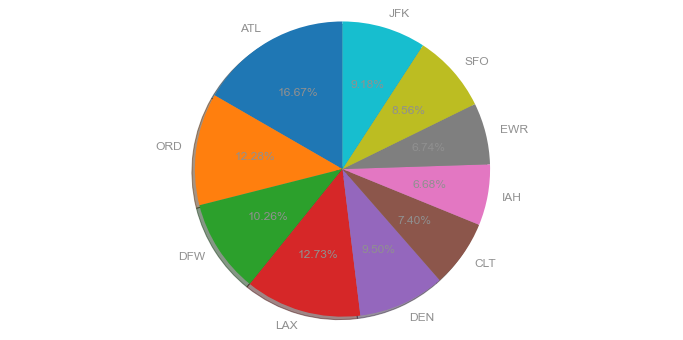

In [67]:
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
sizes = dic_traffic.values()
labels = dic_traffic.keys()
ax.pie(sizes, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [70]:
#make a plotly go layout display for the percentage of highest airport traffic by passengers and traffic

### Task 10: Do bigger delays lead to bigger fuel comsumption per passenger? We need to do four things to answer this as accurate as possible:

- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?